In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Домашняя работа №7

**№1**.
Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

**Решение пункта 1.** По условию:

In [347]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [348]:
df = pd.DataFrame(X, columns = ['x_0', 'x_1', 'x_2', 'x_3'])
df['y'] = y
df

,x_0,x_1,x_2,x_3,y
0,1.224013,2.308685,3.036364,2.692872,9.261934
1,-0.187573,1.303374,5.120930,3.463632,9.700363
2,-0.810945,1.824634,5.796865,1.861594,8.672148
3,0.751290,2.673921,3.655298,1.667461,8.747970
4,0.009724,1.973673,2.505943,1.697552,6.186891
5,-0.629726,0.777508,2.841240,4.544106,7.533127
6,2.295362,1.812067,1.950262,1.518746,7.576438
7,0.092042,2.269714,7.477087,2.610812,12.449655
8,2.392528,3.175640,3.614206,5.107734,14.290107
9,0.549838,2.879887,1.657528,1.596360,6.683612


In [349]:
# матрица корреляции
df.corr()

,x_0,x_1,x_2,x_3,y
x_0,1.000000,0.583421,-0.413786,0.088236,0.351677
x_1,0.583421,1.000000,-0.093920,-0.145230,0.399858
x_2,-0.413786,-0.093920,1.000000,0.129481,0.582637
x_3,0.088236,-0.145230,0.129481,1.000000,0.602917
y,0.351677,0.399858,0.582637,0.602917,1.000000


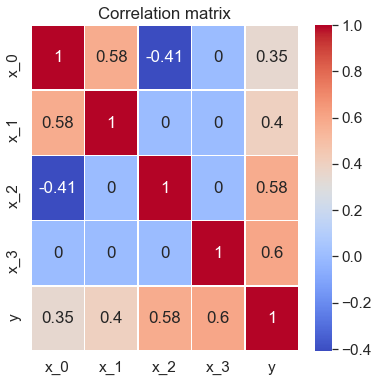

In [350]:
#визуализируем матрицу корреляции
plt.figure(figsize = (6,6))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [351]:
df.corr().iloc[:-1, -1]

x_0    0.351677
x_1    0.399858
x_2    0.582637
x_3    0.602917
Name: y, dtype: float64

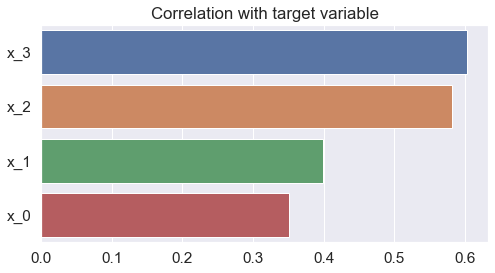

In [352]:
# Строим матрицу корреляции целевой переменной y с признаками датасета df
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(8, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

C целевой переменной больше всего коррелируют признаки x_2 и x_3.

Выясним, модель с какими двумя признаками дает лучшую оценку R2.

In [353]:
pr_list1 = df.columns.tolist()[:-1]  #создаем спискок из всех признаков
for pr1 in pr_list1:
    pr_list2 = df.columns.tolist()[:-1]
    pr_list2.remove(pr1) # список без pr1
    for pr2 in pr_list2:
        X_pr = df[[pr1, pr2]]
        X_pr['1'] = np.ones((X_pr.shape[0], 1))
        X_pr[['1', pr1, pr2]]
        X = X_pr[['1', pr1, pr2]].values
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        b = XTX_inv.dot(X.T).dot(y)
        z = X.dot(b)
        R2 = 1 - ((y - z)**2).sum() / sum_of_squares(df['y'])
        print(f'признаки: {pr1}, {pr2}; R2 = {R2}')
       
#Или так
#pr_list1 = df.columns.tolist()[:-1]  #создаем спискок из всех признаков
#for pr1 in pr_list1:
#    pr_list2 = df.columns.tolist()[:-1]
#    pr_list2.remove(pr1) # список без pr1
#    for pr2 in pr_list2:
#        X_pr = df[[pr1, pr2]]
#        X_pr['1'] = np.ones((X_pr.shape[0], 1))
#        X_pr[['1', pr1, pr2]]
#        X = X_pr[['1', pr1, pr2]].values
#        model = sm.OLS(y, X)
#        results = model.fit()
#        print(f'признаки: {pr1}, {pr2}')
#        print(results.summary(), '\n')  
#   

признаки: x_0, x_1; R2 = 0.18113594742585215
признаки: x_0, x_2; R2 = 0.7634246238793152
признаки: x_0, x_3; R2 = 0.45329667831440756
признаки: x_1, x_0; R2 = 0.18113594742585204
признаки: x_1, x_2; R2 = 0.5479482734039012
признаки: x_1, x_3; R2 = 0.6062055761129932
признаки: x_2, x_0; R2 = 0.7634246238793152
признаки: x_2, x_1; R2 = 0.547948273403901
признаки: x_2, x_3; R2 = 0.6224419876505322
признаки: x_3, x_0; R2 = 0.4532966783144079
признаки: x_3, x_1; R2 = 0.6062055761129933
признаки: x_3, x_2; R2 = 0.622441987650532


*Вывод:* лучшую оценку R2 имеет модель с признаками x_0 и x_2.

Построим модель линейной регрессии, используя эти признаки.

*1 способ (без встроенных функций)*.

In [354]:
# матрица признаков
X_pr = df[['x_0', 'x_2']]

#добавляем к матрице признаков столбец из единиц
X_pr['1'] = np.ones((X_pr.shape[0], 1))
X_pr[['1', 'x_0', 'x_2']]
X = X_pr[['1', 'x_0', 'x_2']].values
X

array([[ 1.        ,  1.22401313,  3.03636353],
       [ 1.        , -0.18757272,  5.12093014],
       [ 1.        , -0.81094525,  5.79686488],
       [ 1.        ,  0.75129018,  3.65529809],
       [ 1.        ,  0.00972362,  2.50594319],
       [ 1.        , -0.62972637,  2.84124027],
       [ 1.        ,  2.29536229,  1.95026215],
       [ 1.        ,  0.0920418 ,  7.47708735],
       [ 1.        ,  2.39252799,  3.61420599],
       [ 1.        ,  0.54983815,  1.65752765]])

Запишем матрицу  $𝑋^T𝑋$  и посчитаем её определитель.

In [355]:
XTX = X.T.dot(X)

np.linalg.det(XTX)

2835.3600226240915

Определитель не равен 0, значит обратная матрица существует.

In [356]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y)

print(b)

[3.62455695 1.62531203 1.21134979]


Модель регрессии имеет вид:
$$y = 3.62 + 1.62 \cdot x_1 + 1.21 \cdot x_2,$$
где $x_1$ — 0-ой признак, $x_2$ — 2-ий признак.

*2 способ (c помощью встроенных функций)*.

In [357]:
model = LinearRegression().fit(X, y)
print(type(model))
model.intercept_, model.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(3.6245569493851146, array([0.        , 1.62531203, 1.21134979]))

Посчитаем коэффициент детерминации

In [358]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

z = X.dot(b)

R2 = 1 - ((y - z)**2).sum() / sum_of_squares(df['y'])
R2

0.7634246238793152

Коэффициент детерминации, равный $0.763$, означает, что $76 \%$ дисперсии переменной $y$ учитывается моделью.

**Решение пункта 2.** Проверим на значимость построенное уравнение линейной регрессии.

Нулевая гипотеза $H_0$: теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен  0 , т.е. что в имеющихся данных вообще нет никакой зависимости.

Альтернативная гипотеза $H_1$: теоретический коэффициент детерминации не равен 0.

Критерий: $F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$

где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. 

Имеет распределение Фишера с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Pассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [359]:
n = X.shape[0]
m = X.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

Критическая область:

In [360]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область: $(4.73; +\infty)$.

Вычисляем наблюдаемое значение, используя критерий.

In [361]:
F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

Поскольку наблюдаемое значение 11.29 попало в критическую область, то нулевую гипотезу о равенстве теоретического коэффициента детерминации 0 отвергаем. Следовательно, полученное уравнение регрессии значимо.

In [362]:
# статистика по построенной модели
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Mon, 23 Aug 2021   Prob (F-statistic):            0.00644
Time:                        01:32:18   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

**№2**.
Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
6. (доп) Посчитать среднюю ошибку аппроксимации

**Решение пункта 1**. Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии.

Пусть $x = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]$, $y = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]$. 

Уравнение линейной (парной) регрессии $y = b_0 + b_1 x + \varepsilon$, где
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

In [363]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [364]:
# находим коэффициенты уравнения линейной регрессии
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

(444.1773573243596, 2.620538882402765)

Модель линейной регрессии: $y = 444.18 + 2.62x$

Найдем коэффициенты линейной регрессии с помощью метода наименьших квадратов.

К матрице, состоящей из принаков, добавим столбец из единиц.

In [365]:
X = pd.DataFrame({'x_i':x})
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Составим матрицу $X^TX$ и вычислим ее определитель.

In [366]:
XTX = X.T.dot(X)

np.linalg.det(XTX)

349464.00000000023

Определитель отличен от 0, значит обратная матрица существует. Вычисляем коэффициенты модели.

In [367]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y)

print(b)

[444.17735732   2.62053888]


Модель линейной (парной) регрессии: $y = 444.18 + 2.62x$.

Коэффициенты модели линейной регрессии с помощью библиотеки sklearn

In [368]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
print(type(model))
model.intercept_, model.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(444.1773573243595, array([0.        , 2.62053888]))

**Решение пункта 2**. Строим диаграмму рассеивания x,y и прямую, соответствующую уравнению регрессии

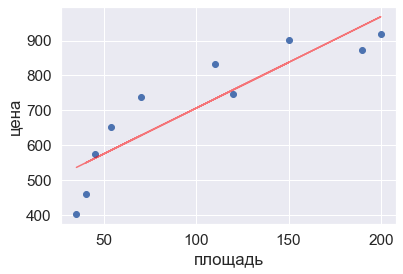

In [369]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена');

**Решение пункта 3**. Найдем коэффициент детерминации.

In [370]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [371]:
z = b0 + b1 * x
R2 = 1 - ((y - z)**2).sum() / sum_of_squares(y)
R2

0.7876386635293686

Коэффициент детерминации, равный $0.788$, означает, что $78 \%$ дисперсии переменной $y$ учитывается моделью.

**Решение пункта 4**. Оценим построенное уравнение регрессии с помощью F-критерия Фишера.

Нулевая гипотеза $H_0$: теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен  0 , т.е. что в имеющихся данных вообще нет никакой зависимости.

Альтернативная гипотеза $H_1$: теоретический коэффициент детерминации не равен 0.

Критерий: $F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$

где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. 

Имеет распределение Фишера с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Pассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [372]:
n = X.shape[0]
m = X.shape[1] - 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

Критическая область:

In [373]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Критическая область: $(5.318; +\infty)$.

Вычисляем наблюдаемое значение, используя критерий.

In [374]:
F = (R2 / k1) / ((1 - R2) / k2)
F

29.67164085966451

Поскольку наблюдаемое значение 29.67 попало в критическую область, то нулевую гипотезу о равенстве теоретического коэффициента детерминации 0 отвергаем. Следовательно, полученное уравнение регрессии значимо.

**Решение пункта 5**. Оценим значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

Построим доверительный интервал для коэффициента наклона b1 = 2.6205

In [375]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [376]:
s_slope = standard_error_slope(X, y, z)
s_slope

0.3078409630645926

In [377]:
gamma = 0.95 #уровень доверия
alpha = 1 - gamma

n = X.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.3060041350333704, 2.3060041350333704)

Доверительный интервал для b1:

In [378]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(1.9106563486431594, 3.3304214161623706)

Построим доверительный интервал для коэффициента сдвига b0 = 444.1774.

In [379]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [380]:
s_intercept = standard_error_intercept(X, y, z)
s_intercept

25.55042903894264

Доверительный интервал для b0:

In [381]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(385.25796230868116, 503.09675234003805)

**Решение пункта 6(доп)**. Посчитаем среднюю ошибку аппроксимации
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [382]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [383]:
mean_approximation_error(y, z)

0.11469251843561709

Средняя ошибка аппроксимации 11%, теоретические значения статистически различимы с теми, которые выдает модель.

In [384]:
#статистическая информация о модели
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           0.000611
Time:                        01:32:19   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0